In [1]:
import numpy as np
import matplotlib.pyplot as plt

function
$$ 
\frac{dy}{dx} = y^2 +1
$$

In [2]:
def func(x,y):
    dydx = y**2 + 1 
    return dydx

def func_exact(x):
    y = np.tan(x)
    return y


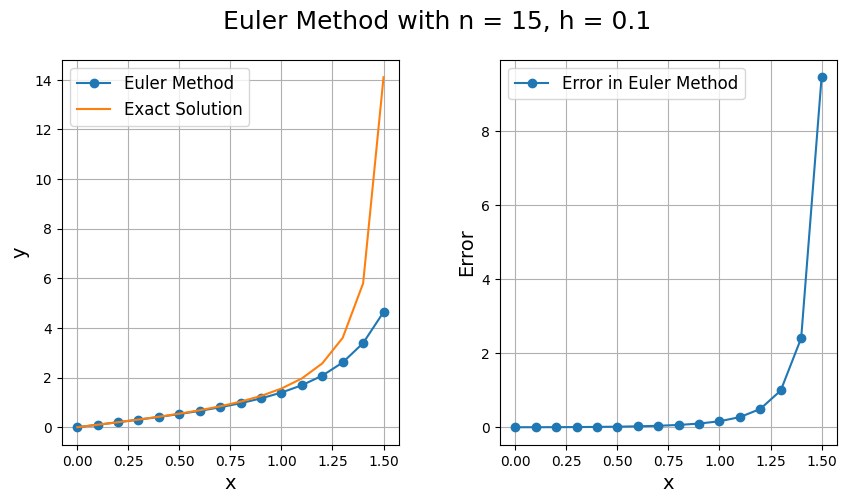

In [3]:
# Euler method
# initial guess
x0 = 0 
y0 = 0
err0 = np.tan(x0) - y0
xn = 1.5
h_euler = 0.10

def euler(f, x0, y0, h, xn):
    n = int((xn-x0)/h)
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    error = np.zeros(n + 1)
    x[0] = x0
    y[0] = y0
    error[0] = np.tan(x0) - y0 
    i = 0

    #print(f"steps: {n}")
    #print(f"x0: {x0:.2f}, y0: {y0:.2f}, error0: {err0:.2f}"  )
    for i in range(n):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * f(x[i], y[i])
        
        y_exact = func_exact(x[i+1])
        error[i+1] = np.abs(y_exact - y[i+1])

        #print(f"y_exact{i+1}: {y_exact[i+1]:.3f})
        #print(f"x{i+1}: {x[i+1]:.2f}, y{i+1}: {y[i+1]:.3f}, y_exact{i+1}: {y_exact:.6f}, error{i+1}: {error[i+1]:.3f}")
        
        i += 1

    return x, y, error, n

x1_euler, y1_euler, error_euler, steps_euler = euler(func, x0, y0, h_euler, xn)

# Plot
plt.figure(figsize=(10,5))
plt.suptitle(f"Euler Method with n = {steps_euler}, h = {h_euler}", fontsize=18)

plt.subplot(1,2,1)
plt.plot(x1_euler, y1_euler, 'o-', color='tab:blue', label="Euler Method")
plt.plot(x1_euler, func_exact(x1_euler), color='tab:orange', label="Exact Solution")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid()

plt.subplot(1,2,2)
plt.plot(x1_euler, error_euler, 'o-', color='tab:blue', label="Error in Euler Method")
#plt.plot(x1_euler, func_exact(x1_euler), color='tab:orange', label="Exact Solution")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('Error', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid()

plt.subplots_adjust(wspace=0.3)

#plt.savefig('HW03_Prob1_Euler.png', dpi=250, transparent=True)

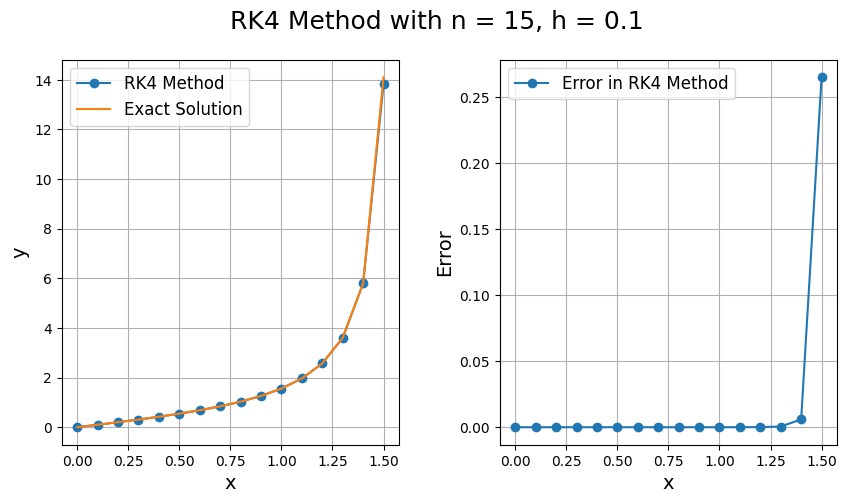

In [4]:
# RK4 method
# initial guess
x0 = 0 
y0 = 0
xn = 1.5
h_RK4 = 0.1

def RK4(f, x0, y0, h, xn):
    n = int((xn-x0)/h)
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    error = np.zeros(n + 1)
    x[0] = x0
    y[0] = y0
    error[0] = np.tan(x0) - y0 
    i = 0
    
    #print(f"steps: {n}")
    #print(f"x0: {x0:.2f}, y0: {y0:.2f}, error0: {err0:.2f}"  )
    for i in range(n):
        k1 = f(x[i],y[i])
        k2 = f(x[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(x[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(x[i] + h, y[i] + h*k3)
        
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        x[i+1] = x[i] + h

        y_exact = func_exact(x[i+1])
        error[i+1] = np.abs(y_exact - y[i+1])

        #print(f"x{i+1}: {x[i+1]:.2f}, y{i+1}: {y[i+1]:.3f}, error{i+1}: {error[i+1]:.3f}")
        i += 1

    return x, y, error, n

x1_RK4, y1_RK4, error_RK4, steps_RK4 = RK4(func, x0, y0, h_RK4, xn)

# Plot
plt.figure(figsize=(10,5))
plt.suptitle(f"RK4 Method with n = {steps_RK4}, h = {h_RK4}", fontsize=18)

plt.subplot(1,2,1)
plt.plot(x1_RK4, y1_RK4, 'o-', color='tab:blue', label="RK4 Method")
plt.plot(x1_RK4, func_exact(x1_RK4), color='tab:orange', label="Exact Solution")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid()

plt.subplot(1,2,2)
plt.plot(x1_RK4, error_RK4, 'o-', color='tab:blue', label="Error in RK4 Method")
#plt.plot(x1_euler, func_exact(x1_euler), color='tab:orange', label="Exact Solution")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('Error', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid()

plt.subplots_adjust(wspace=0.3)

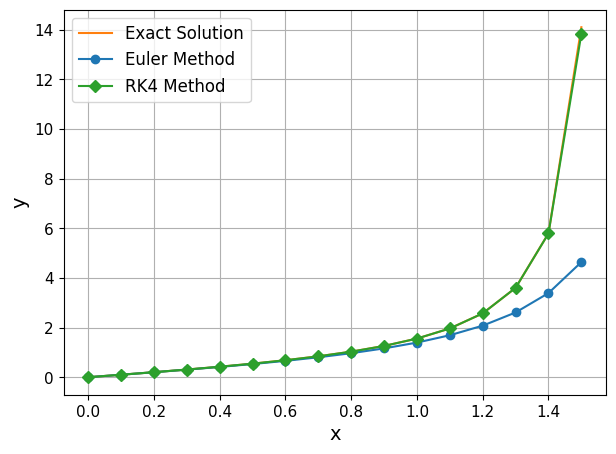

In [5]:
# Comparsion
plt.figure(figsize=(7,5))
plt.plot(x1_RK4, func_exact(x1_RK4), color='tab:orange', label="Exact Solution")
plt.plot(x1_euler, y1_euler, 'o-', color='tab:blue', label="Euler Method")
plt.plot(x1_RK4, y1_RK4, 'D-', color='tab:green', label="RK4 Method")
plt.legend(fontsize=12)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.grid()
plt.show()

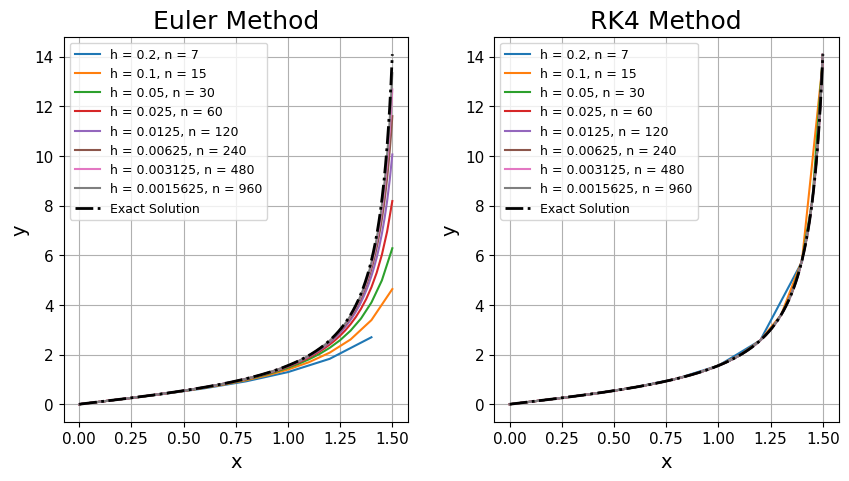

In [35]:
# Convergence study
# Using multiple value of h (step size)
# and using smallest h as a reference value

h_values = [0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
h_ref = min(h_values)

euler_sol = {}
RK4_sol = {}
steps_e = {}
steps_rk4 = {}

plt.figure(figsize=(10,5))

for h in h_values:
    x_euler, y_euler, error_euler, steps_euler = euler(func, x0, y0, h, xn)
    euler_sol[h] = y_euler[-1]   # store final y value
    steps_e[h] = steps_euler
    

    x_RK4, y_RK4, error_RK4, steps_RK4 = RK4(func, x0, y0, h, xn)
    RK4_sol[h] = y_RK4[-1]   # store final y value
    steps_rk4[h] = steps_RK4

    
    plt.subplot(1,2,1)
    plt.title(f"Euler Method", fontsize=18)
    plt.plot(x_euler, y_euler, label=f"h = {h}, n = {int((xn-x0)/h)}")
    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    plt.xticks(size=11)
    plt.yticks(size=11)
    plt.legend(fontsize=8)

    plt.subplot(1,2,2)
    plt.title(f"RK4 Method", fontsize=18)
    plt.plot(x_RK4, y_RK4, label=f"h = {h}, n = {int((xn-x0)/h)}")
    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    plt.xticks(size=11)
    plt.yticks(size=11)
    plt.legend()

    plt.subplots_adjust(wspace=0.25)

#plt.plot(x1_RK4, func_exact(x1_RK4), linestyle='-.' , color='tab:orange', label="Exact Solution")
#plt.legend()

plt.subplot(1,2,1)
plt.plot(x_euler, func_exact(x_euler), linestyle='-.', color='black', linewidth=2, label="Exact Solution")
plt.legend(fontsize=9)
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_RK4, func_exact(x_RK4), linestyle='-.', color='black', linewidth=2, label="Exact Solution")
plt.legend(fontsize=9)
plt.grid()

yref_euler = euler_sol[h_ref]
yref_RK4 = RK4_sol[h_ref]

h_plot = []
error_euler = []
error_RK4 = []
#print("h        n        y(xn)        fractional error")

for h in h_values:
    if h != h_ref:
        #diff = abs((solutions[h] - y_highres) / y_highres)
        #print(f"{h:<8} {steps_e[h]:<8} {solutions[h]:<12.6f} {diff:.6e}")
        diff_euler = abs((euler_sol[h] - yref_euler)/yref_euler)
        diff_RK4 = abs((RK4_sol[h] - yref_RK4)/yref_RK4)

        h_plot.append(h)
        error_euler.append(diff_euler)
        error_RK4.append(diff_RK4)



In [36]:
slope_euler, _ = np.polyfit(np.log(h_plot), np.log(error_euler), 1)
slope_RK4, _ = np.polyfit(np.log(h_plot), np.log(error_RK4), 1)

print("Euler order ≈", slope_euler)
print("RK4 order ≈", slope_RK4)

Euler order ≈ 0.6365660459750415
RK4 order ≈ 3.8304379671285944


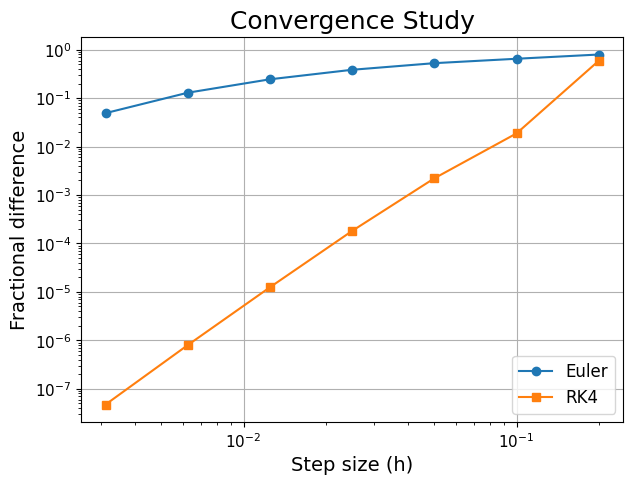

In [37]:
plt.figure(figsize=(7,5))

plt.title('Convergence Study', fontsize=18)
plt.loglog(h_plot, error_euler, 'o-', label='Euler')
plt.loglog(h_plot, error_RK4, 's-', label='RK4')

plt.legend(fontsize=12)
plt.xlabel('Step size (h)', size=14)
plt.ylabel('Fractional difference', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.grid(True)
#plt.grid(True, which="both", ls="-")

plt.show()

In [11]:
# Comparison of high res to the true value
yref_euler = euler_sol[h_ref]
yref_RK4 = RK4_sol[h_ref]

# fractional errors relative to exact solution
error_exact_euler = abs((yref_euler - func_exact(xn)) / func_exact(xn))
error_exact_RK4 = abs((yref_RK4 - func_exact(xn)) / func_exact(xn))

print("Exact y(xn)         :", func_exact(xn))
print("Euler (reference)   :", yref_euler)
print("RK4 (reference)     :", yref_RK4)
print()
print("Fractional error (Euler):", error_exact_euler)
print("Fractional error (RK4)  :", error_exact_RK4)

Exact y(xn)         : 14.101419947171719
Euler (reference)   : 11.60675624678243
RK4 (reference)     : 14.101408637780775

Fractional error (Euler): 0.17690868790058525
Fractional error (RK4)  : 8.020036979329179e-07


$$
f(v)dv = \left[ \frac{m}{2 \pi kT} \right]^{3/2} 4 \pi v^2 \exp{\left( -\frac{mv^2}{2kT} \right) } dv
$$

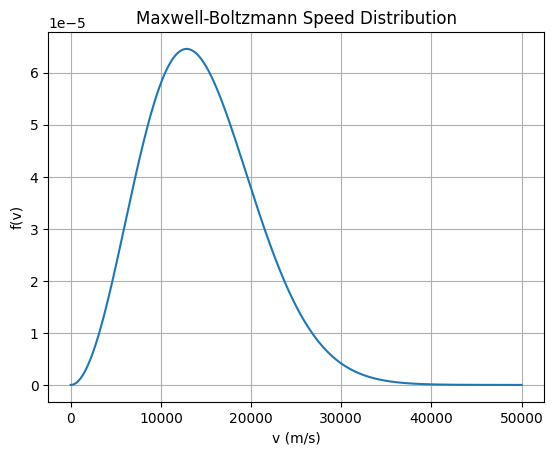

In [12]:
# MB distribution
k = 1.38e-23 # in J/k
m = 1.67e-27 # in kg, mass of hydrogen atom
T = 1e4 # in K
def MB(v):
    first = (m/(2 * np.pi * k * T))**(3/2)
    second = 4 * np.pi * v**2
    third = - m * v**2 / (2 * k * T)
    f = first * second * np.exp(third)
    return f

# Velocity range
v = np.linspace(0, 50000, 1000)

# Plot
plt.plot(v, MB(v))
plt.xlabel("v (m/s)")
plt.ylabel("f(v)")
plt.title("Maxwell-Boltzmann Speed Distribution")
plt.grid(True)
plt.show()

In [ ]:
# Using your own numerical integrator, calculate what fraction of the hydrogen atoms
# are moving fast enough for the kinetic energy to be enough to excite the atom from the
# ground state (n=1) into the first excited state (n=2). This requires an integration from the
# minimum speed to a speed of "infinity." 

# Using Bohr formula

$$
E_n = - \frac{13.6}{n^2} \\
KE = \frac{3}{2}kT \\
KE = \frac{1}{2}mv^2 \\
%v = \sqrt{\frac{3kT}{m}}
$$

In [60]:
# Bohr
eV = 1.6e-19 #conversion from eV to J
def bohr(n): 
    E = - 13.6/n**2 #in eV
    return E
E1 = bohr(1)
E2 = bohr(2)
deltaE = E2 - E1

def vel_type(T):
    v_prob = np.sqrt(2*k*T/m)           # most probable speed
    v_mean = np.sqrt(8*k*T/(np.pi*m))   # mean speed
    v_sqr = np.sqrt(3*k*T/m)            # rms speed
    return v_prob, v_mean, v_sqr 

# temperature to excite
Tex = 2 * deltaE*eV / (3 * k)

# velocity
v_prob, v_mean, v_sqr = vel_type(T)

vel = np.sqrt(2 * deltaE * eV / m)
#vel = 2 * deltaE * eV / (3 * k)
KE = 0.5*m*v_mean**2

print(f"v_prob: {v_prob:.3f} m/s, v_mean: {v_mean:.3f} m/s, v_sqr: {v_sqr:.3f} m/s")
print(f"Excitation energy: {deltaE} eV")
print(f"KE: {KE/eV} eV")
print(f"delta E: {deltaE*eV} J, {deltaE} eV")
print(f"T_excite: {Tex:.3f} K")
print(f"v_excite: {vel} m/s")


v_prob: 12855.717 m/s, v_mean: 14506.123 m/s, v_sqr: 15744.974 m/s
Excitation energy: 10.2 eV
KE: 1.0981691073340778 eV
delta E: 1.6319999999999999e-18 J, 10.2 eV
T_excite: 78840.580 K
v_excite: 44209.62585188967 m/s
